In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

df=pd.read_csv(r"D:\2025 to 2026 Data science\Project\Electric Vehicle Sales by State in India.csv")


In [4]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [5]:
df.tail()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
96840,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0
96844,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (PASSENGER),3-Wheelers,3W_Shared,0.0


In [6]:
df.describe()

,Year,EV_Sales_Quantity
count,96845.000000,96845.000000
mean,2018.622768,37.108896
std,2.895581,431.566675
min,2014.000000,0.000000
25%,2016.000000,0.000000
50%,2019.000000,0.000000
75%,2021.000000,0.000000
max,2024.000000,20584.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [8]:
df['Year']=df['Year'].astype(int)

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [10]:
categorical_cols = ['Month_Name', 'State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type']
df[categorical_cols] = df[categorical_cols].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               96845 non-null  int32         
 1   Month_Name         96845 non-null  category      
 2   Date               96845 non-null  datetime64[ns]
 3   State              96845 non-null  category      
 4   Vehicle_Class      96845 non-null  category      
 5   Vehicle_Category   96845 non-null  category      
 6   Vehicle_Type       96845 non-null  category      
 7   EV_Sales_Quantity  96845 non-null  float64       
dtypes: category(5), datetime64[ns](1), float64(1), int32(1)
memory usage: 2.3 MB


In [12]:
#check duplicate and missing value
print("Duplicates:",df.duplicated().sum())
print("Missing values:",df.isnull().sum())


Duplicates: 0
Missing values: Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


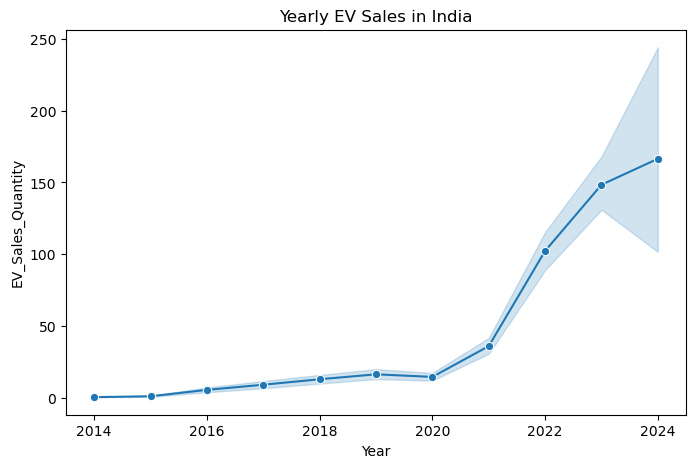

In [13]:
# yearly EV sales trend
plt.figure(figsize=(8,5))
sns.lineplot(x='Year', y='EV_Sales_Quantity',data=df, marker='o')
plt.title("Yearly EV Sales in India")
plt.show()

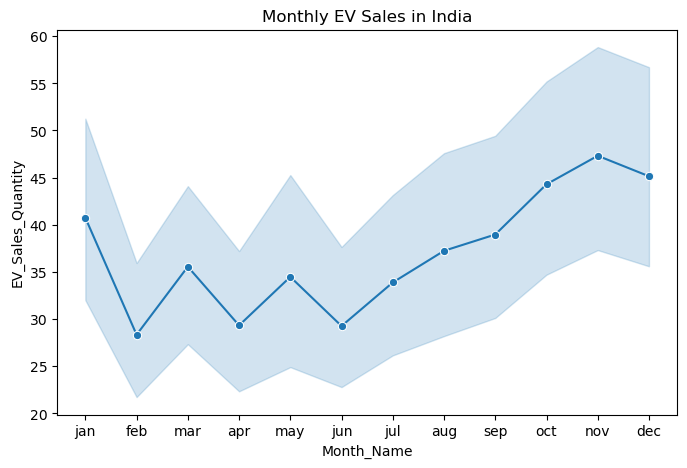

In [ ]:
#montly EV sales trend
plt.figure(figsize=(8,5))
month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

df['Month_Name'] = pd.Categorical(df['Month_Name'], categories=month_order, ordered=True)

sns.lineplot(x='Month_Name', y='EV_Sales_Quantity', data=df, marker='o')
plt.title("Monthly EV Sales in India")
plt.show()

C:\Users\seema\AppData\Local\Temp\ipykernel_17356\448366636.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_states = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(10)


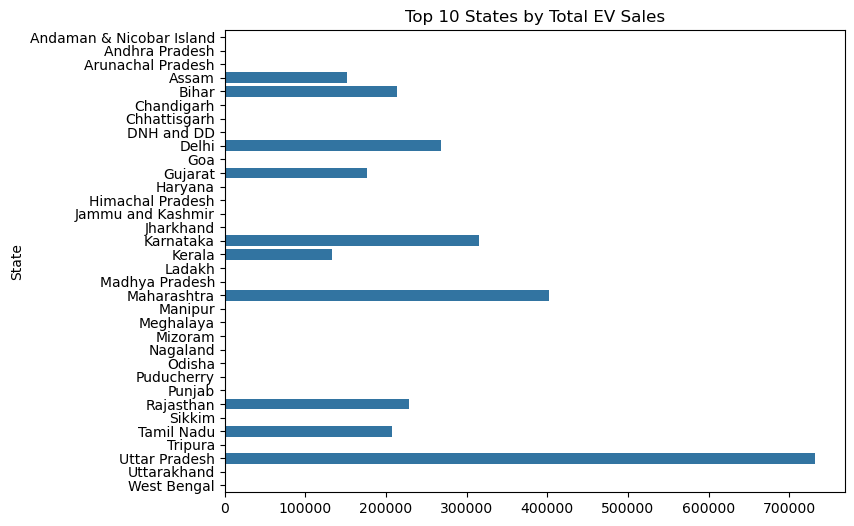

In [ ]:
#state-wise sales
top_states = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(y=top_states.index, x=top_states.values)
plt.title("Top 10 States by Total EV Sales")
plt.show()


C:\Users\seema\AppData\Local\Temp\ipykernel_17356\1185885812.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Vehicle_Category', y='EV_Sales_Quantity', data=df, estimator=sum, ci=None)


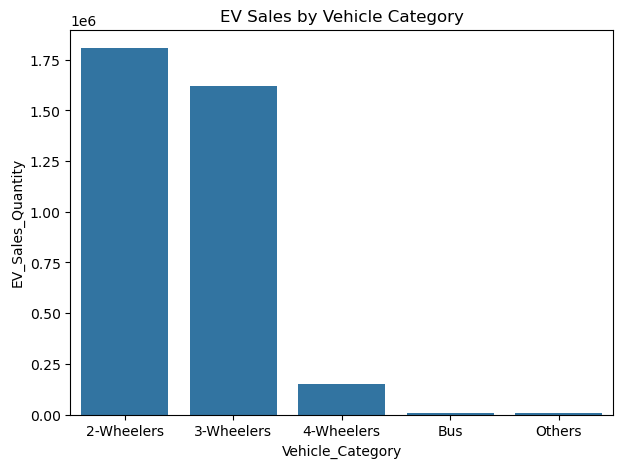

In [ ]:
# 
plt.figure(figsize=(7,5))
sns.barplot(x='Vehicle_Category', y='EV_Sales_Quantity', data=df, estimator=sum, ci=None)
plt.title("EV Sales by Vehicle Category")
plt.show()

C:\Users\seema\AppData\Local\Temp\ipykernel_17356\3757167792.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Vehicle_Type', y='EV_Sales_Quantity', data=df, estimator=sum, ci=None)


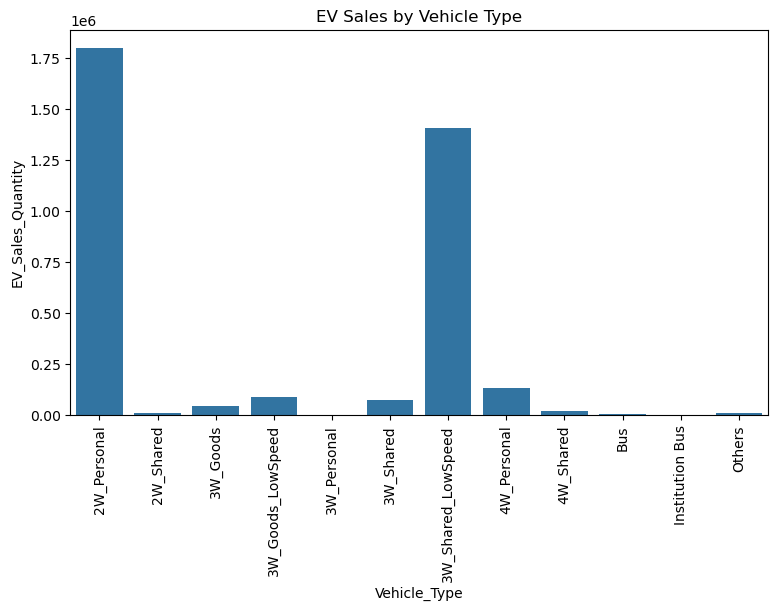

In [ ]:
#Ev Vehile sales
plt.figure(figsize=(9,5))
sns.barplot(x='Vehicle_Type', y='EV_Sales_Quantity', data=df, estimator=sum, ci=None)
plt.xticks(rotation=90)
plt.title("EV Sales by Vehicle Type")
plt.show()

In [25]:
#feature engineering
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type'], drop_first=True)
df_encoded.drop(['Date','Month_Name'], axis=1, inplace=True)

In [ ]:
# Model Building & Evaluation
from skSlearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df_encoded.drop('EV_Sales_Quantity', axis=1)
y = df_encoded['EV_Sales_Quantity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 130.47831266925095


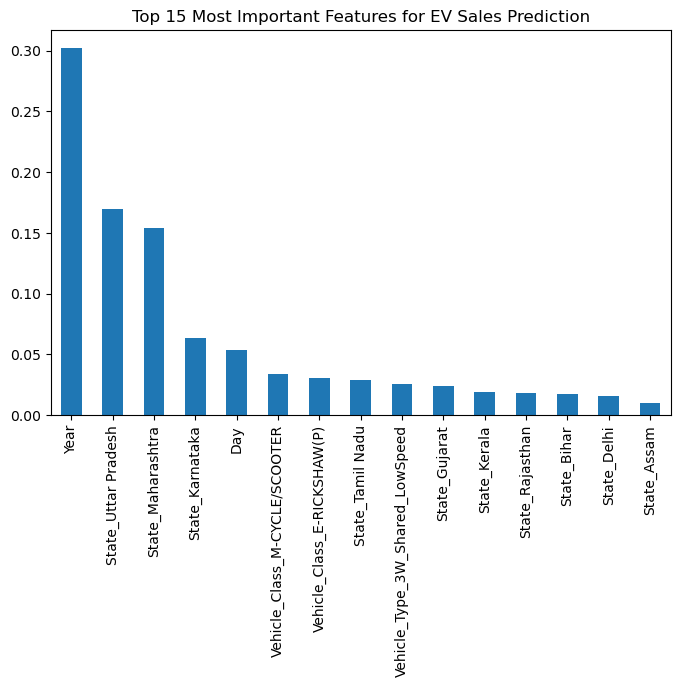

In [30]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False).head(15)
plt.figure(figsize=(8,5))
feat_imp.plot(kind='bar')
plt.title("Top 15 Most Important Features for EV Sales Prediction")
plt.show()